In [1]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
inputFile = "/Users/allenayodeji/Desktop/BANK-MARKETING-CAMPAIGN-/bank-full.csv"
df = pd.read_csv(inputFile, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# number of rows in dataset

print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))

Bank marketing dataset consists of 45211 rows.


In [4]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

From the above we can see that there are no missing values

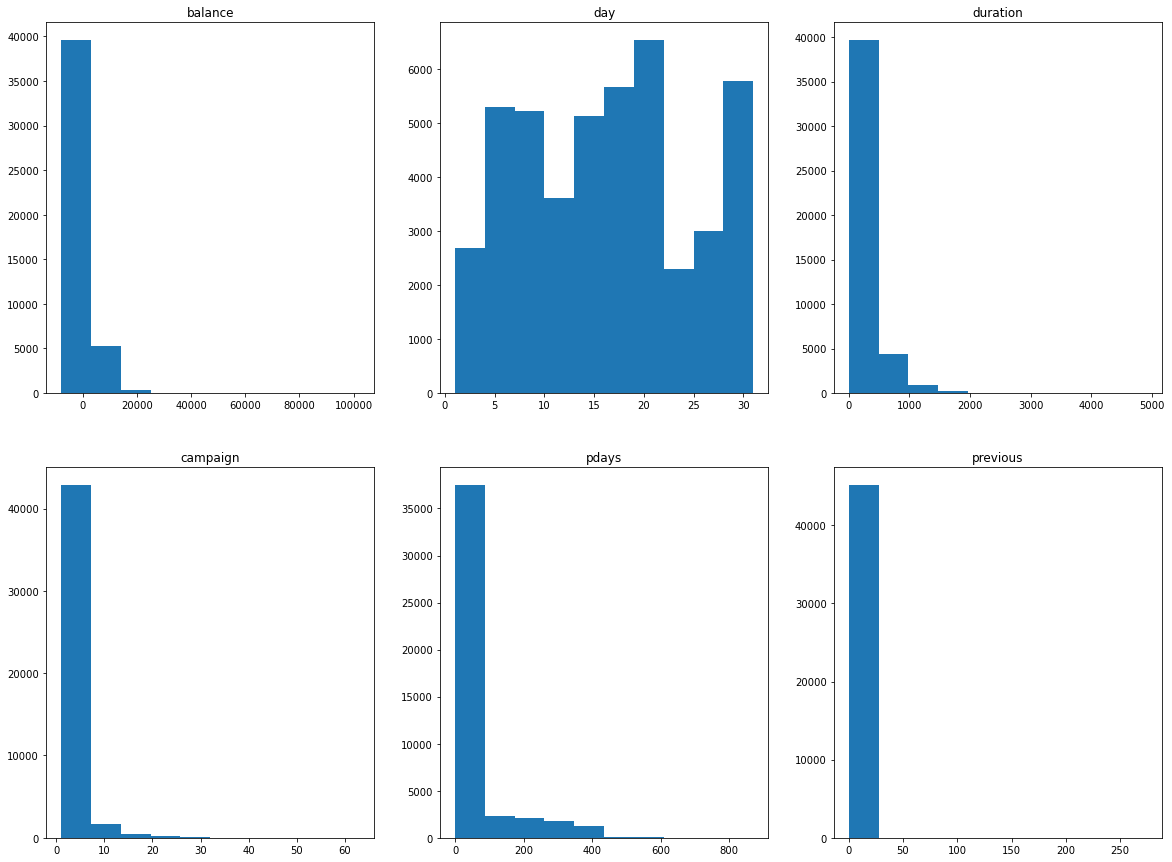

In [5]:
# For the numerical Data
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

We can see that numerical columns have outliers (especially 'pdays', 'campaign' and 'previous' columns). Possibly there are incorrect values (noisy data), so we should look closer at the data and decide how do we manage the noise.

In [6]:
df[['pdays', 'campaign', 'previous']].describe() 

,pdays,campaign,previous
count,45211.000000,45211.000000,45211.000000
mean,40.197828,2.763841,0.580323
std,100.128746,3.098021,2.303441
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,63.000000,275.000000


In [7]:
#Percentage of 'pdays' values above 400:

len (df[df['pdays'] > 400] ) / len(df) * 100

0.5175731569750724

'pdays' holds the number of days that passed by after the client was last contacted from a previous campaign Looking closer into 'pdays' data we can see that:
only 0.58% of values above 400. They are possibly outliers, so we should consider imputing something (possibly mean value) instead of these values. -1 possibly means that the client wasn't contacted before or stands for missing data.

In [8]:
''' To deal with the -1 we have to be sure about what to carry out on the data, do we go for the mean,
mode or the median '''




' To deal with the -1 we have to be sure about what to carry out on the data, do we go for the mean,\nmode or the median '

In [9]:
# We will be applying the Boxplot and the Distribution plot for this

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pdays'>

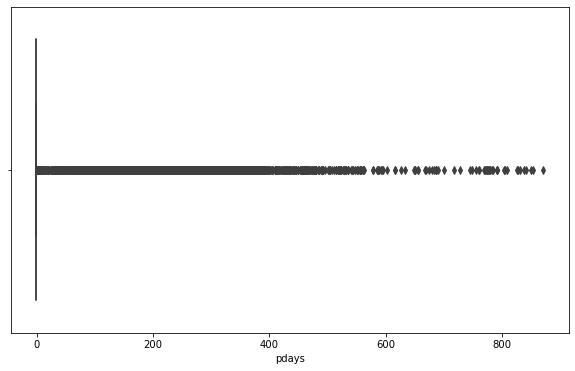

In [10]:
#Boxplot for deciding whether to use mean, mode or median for imputation
ax= plt.subplots (figsize=(10, 6))
sns.boxplot (df.pdays)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pdays', ylabel='Density'>

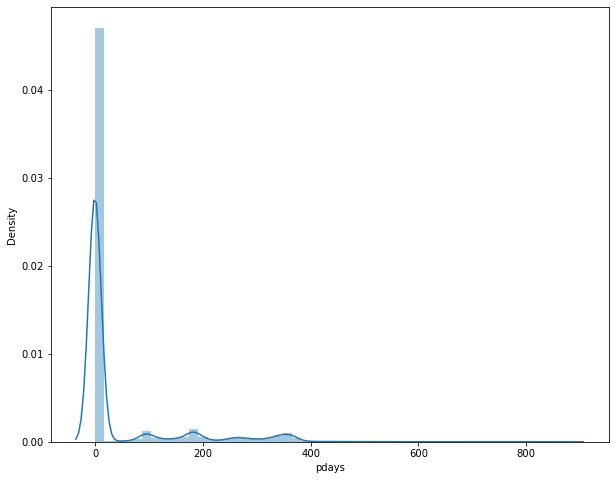

In [11]:
# Distribution plot for deciding imputation technique
ax = plt.subplots (figsize=(10, 8) )
sns.distplot(df.pdays)

In [12]:
df["pdays"].mode()

0   -1
dtype: int64

In [13]:
df["pdays"].median()

-1.0

In [14]:
df["pdays"].mean()

40.19782796222158

In [15]:
#From the Box Plot we can see reasonable distribution
# We would be replacing the '-1' with the mean of df['pdays']

In [16]:
df = df.replace(to_replace = -1, value = 40.19782796222158)

In [18]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,40.197828,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,40.197828,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,40.197828,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,40.197828,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,40.197828,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,40.197828,0,unknown,yes
45207,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,40.197828,0,unknown,yes
45208,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184.000000,3,success,yes
45209,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,40.197828,0,unknown,no
